### Marketing Mix Model

A Marketing Mix Model is a modeling technique used to determine market attribution, the estimated impact of each marketing channel that a given company is using.

Unlike Attribution Modeling, another technique used for marketing attribution, Marketing Mix Models attempt to measure the impact of immeasurable marketing channels, like TV, radio, and newspapers.

Generally, your output variable will be sales or conversions, but can also be things like website traffic. Your input variables typically consist of marketing spend by channel by period (day, week, month, quarter, etc…), but can also include other variables which we’ll get to later.

#### Uses of MMM

-To get a better understanding of the relationships between your marketing channels and your target metric (i.e. conversions).
-To distinguish high ROI marketing channels from low ones and ultimately better optimize your marketing budget.
-To predict future conversions based on given inputs.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.formula.api as sm

In [3]:
df = pd.read_csv("D:/new/projects/Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df = df.drop(['Unnamed: 0'], axis=1)

#### Correlation Matrix

To reiterate, a correlation matrix is a table that shows the correlation values for each pair-relationship. It’s a very fast and efficient way of understanding feature relationships. Here’s the code for our matrix.



<AxesSubplot:>

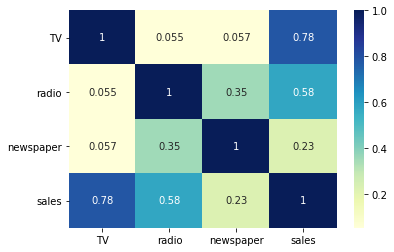

In [47]:
# compute correlation matrix
corr = df.corr()

# create heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")

#### Pair plot

A pair plot is a simple way to visualize the relationships between each variable — it’s similar to a correlation matrix except it shows a graph for each pair-relationship instead of a correlation. Now let’s take a look at the code for our pair plot.

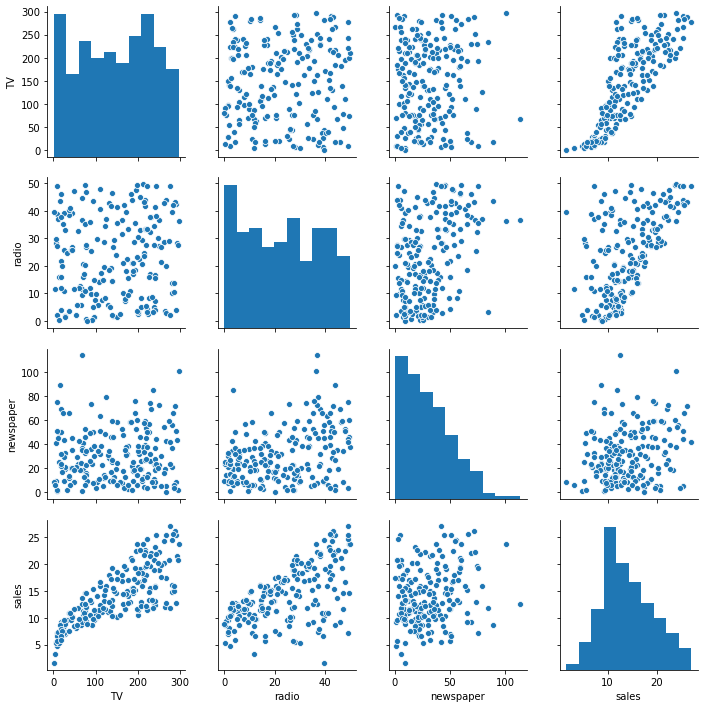

In [16]:
sns.pairplot(df)

#### Feature Importance

Feature importance allows you to determine how “important” each input variable is to predict the output variable. A feature is important if shuffling its values increases model error because this means the model relied on the feature for the prediction.

In [20]:
X = df.drop(['sales'], axis=1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [26]:
model = RandomForestRegressor(random_state= 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)  # Visualizing Feature Importance

<AxesSubplot:>

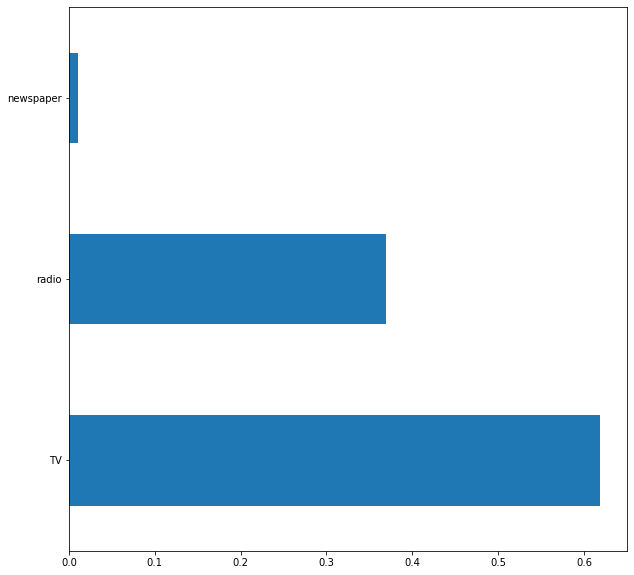

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

The code above is first creating a random forest model with sales as the target variable and the marketing channels as the feature inputs. Once the model is created, we then calculate the feature importance of each predictor and plot it on a bar chart. There seems to be a pattern, where TV is the most important, followed by radio, leaving newspaper last. Next comes actually building the model.

### Build the Marketing Mix Model (aka. OLS model)

It’s time to build our marketing mix model! Another way to refer to the model we’re building is an OLS model, short for ordinary least squares, which is a method used to estimate the parameters in a linear regression model. An OLS model is a type of regression model that is most commonly used when building marketing mix models.

In [31]:
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        16:43:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

The code above creates our ordinary least squares regression model, which specifies that we’re predicting sales based on TV, radio, and newspaper marketing dollars.

#### Plot Actual vs Predicted Values
Next, let’s graph the predicted sales values with the actual sales values to visually see how our model performs. This is a particularly useful thing to do in a business use case if you’re trying to see how well your model reflects what’s actually happening — in this case, if you’re trying to see how well your model predicts sales based on the amount spent in each marketing channel.

In [33]:
from matplotlib.pyplot import figure

In [34]:
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672


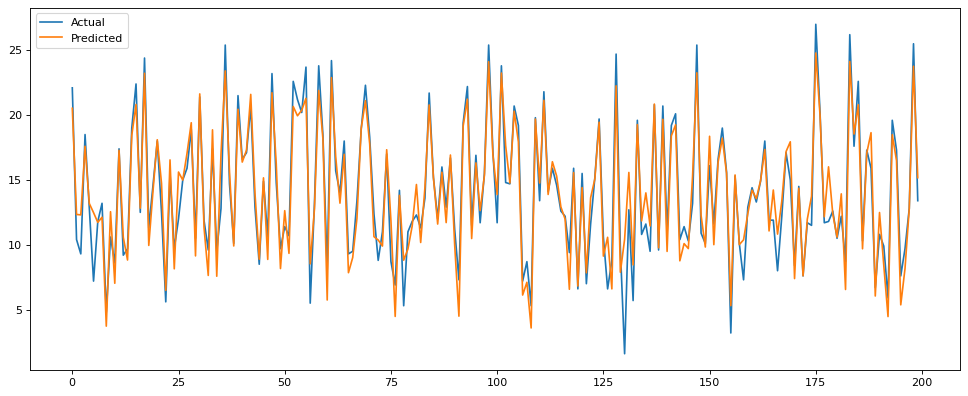

In [41]:
from matplotlib.pyplot import figure

y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

y1 = df_temp['Actual']
y2 = df_temp['Predicted']

plt.plot(y1, label='Actual')
plt.plot(y2, label='Predicted')

plt.legend()
plt.show()

#### How to Interpret a Marketing Mix Model


In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        17:05:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

The Adj. R-squared is 0.896. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesn’t account for 10% of the data used — this could be due to missing variables, for example if there was another marketing channel that wasn’t included, or simply due to noise in the data.


At the top half, you can see Prob (F-statistic): 1.58e-96. This probability value (p-value) represents the likelihood that there are no good predictors of the target variable — in this case, there are no good predictors of sales. Since the p-value is close to zero, we know that there is at least one predictor in the model that is a good predictor of sales.



If you look at the column, P>|t|, you can see the p-values for each predictor. The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. Generally, you want the p-value to be less than 1% or 5%, which are the two standards in practice.


